<a href="https://colab.research.google.com/github/Novaz-Edd/Machine-Learning-Models/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LOGISTIC REGRESSION**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 1. Read the uploaded file name "heart.csv"
df = pd.read_csv('heart.csv')

# 2. Preprocessing (Turn 'sex: male' into 'sex_male: 1')
df = pd.get_dummies(df, drop_first=True)

# 3. Separate Input (X) and Target (y)
# Target is 'target' (1 = Heart Disease, 0 = Healthy)
X = df.drop('target', axis=1)
y = df['target']

# 4. Split into Train (80%) and Test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"✅ Data Loaded! Training with {X_train.shape[0]} patients.")
print(f"Testing with {X_test.shape[0]} patients.")

✅ Data Loaded! Training with 242 patients.
Testing with 61 patients.


# **Logistic Regression**

🎯 Accuracy: 0.89 (This means 88.52459016393442% of predictions were correct)



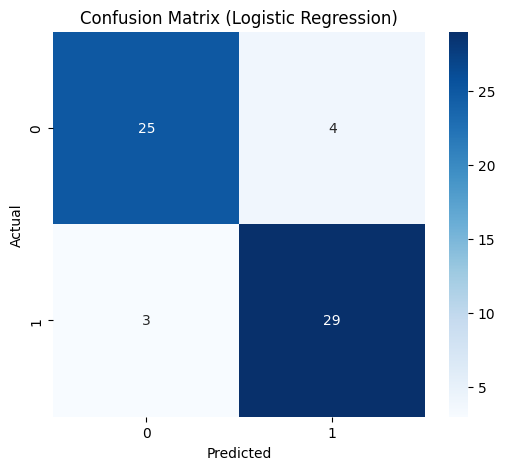

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Train the Model
# max_iter=1000 ensures it has enough time to find the math solution
model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)

# 2. Predict on new data
y_pred = model.predict(X_test)

# 3. See how well it did
acc = accuracy_score(y_test, y_pred)
print(f"🎯 Accuracy: {acc:.2f} (This means {acc*100}% of predictions were correct)\n")

# 4. Visualize the Confusion Matrix
# This shows exactly where the model made mistakes
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Logistic Regression)')
plt.show()

# **Algorithm Under the Hood**

Iteration 0: Cost 0.6931
Iteration 500: Cost 0.3483
Iteration 1000: Cost 0.3482
Iteration 1500: Cost 0.3482

🎯 Accuracy from Scratch: 0.85


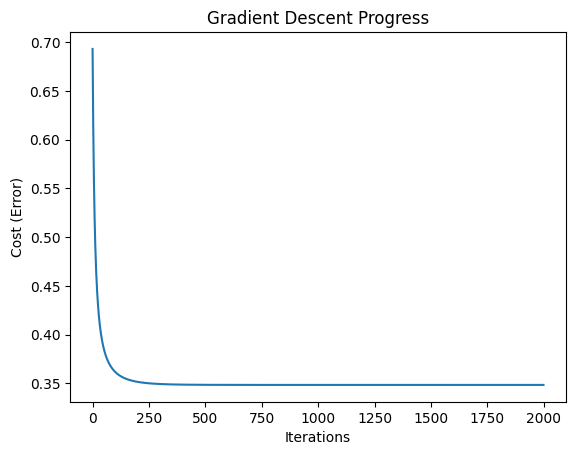

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Load Data
df = pd.read_csv('heart.csv')
X = df.drop('target', axis=1).values
y = df['target'].values

# 2. Preprocessing
# Note: Gradient Descent works MUCH better if data is normalized (scaled)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# --- CLASS DEFINITION ---

class LogisticRegressionFromScratch:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None
        self.cost_history = []

    # Math Step 2: Sigmoid Function
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        m, n = X.shape  # m = number of samples, n = number of features

        # Initialize weights and bias to zeros
        self.weights = np.zeros(n)
        self.bias = 0

        # Math Step 4: Gradient Descent Loop
        for i in range(self.num_iterations):

            # 1. Forward Pass (Linear Equation + Sigmoid)
            z = np.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(z)

            # 2. Compute Gradients (The Derivative)
            dw = (1 / m) * np.dot(X.T, (y_pred - y))
            db = (1 / m) * np.sum(y_pred - y)

            # 3. Update Parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            # Optional: Calculate Cost (Math Step 3) to track progress
            cost = -np.mean(y * np.log(y_pred + 1e-9) + (1-y) * np.log(1-y_pred + 1e-9))
            self.cost_history.append(cost)

            if i % 500 == 0:
                print(f"Iteration {i}: Cost {cost:.4f}")

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(z)
        # Convert probability to class 0 or 1
        return [1 if p >= 0.5 else 0 for p in y_pred]

# --- RUNNING THE MODEL ---

# Train
model = LogisticRegressionFromScratch(learning_rate=0.1, num_iterations=2000)
model.fit(X_train, y_train)

# Predict
predictions = model.predict(X_test)

# Accuracy Check
accuracy = np.mean(predictions == y_test)
print(f"\n🎯 Accuracy from Scratch: {accuracy:.2f}")

# Visualize Learning
plt.plot(model.cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost (Error)')
plt.title('Gradient Descent Progress')
plt.show()

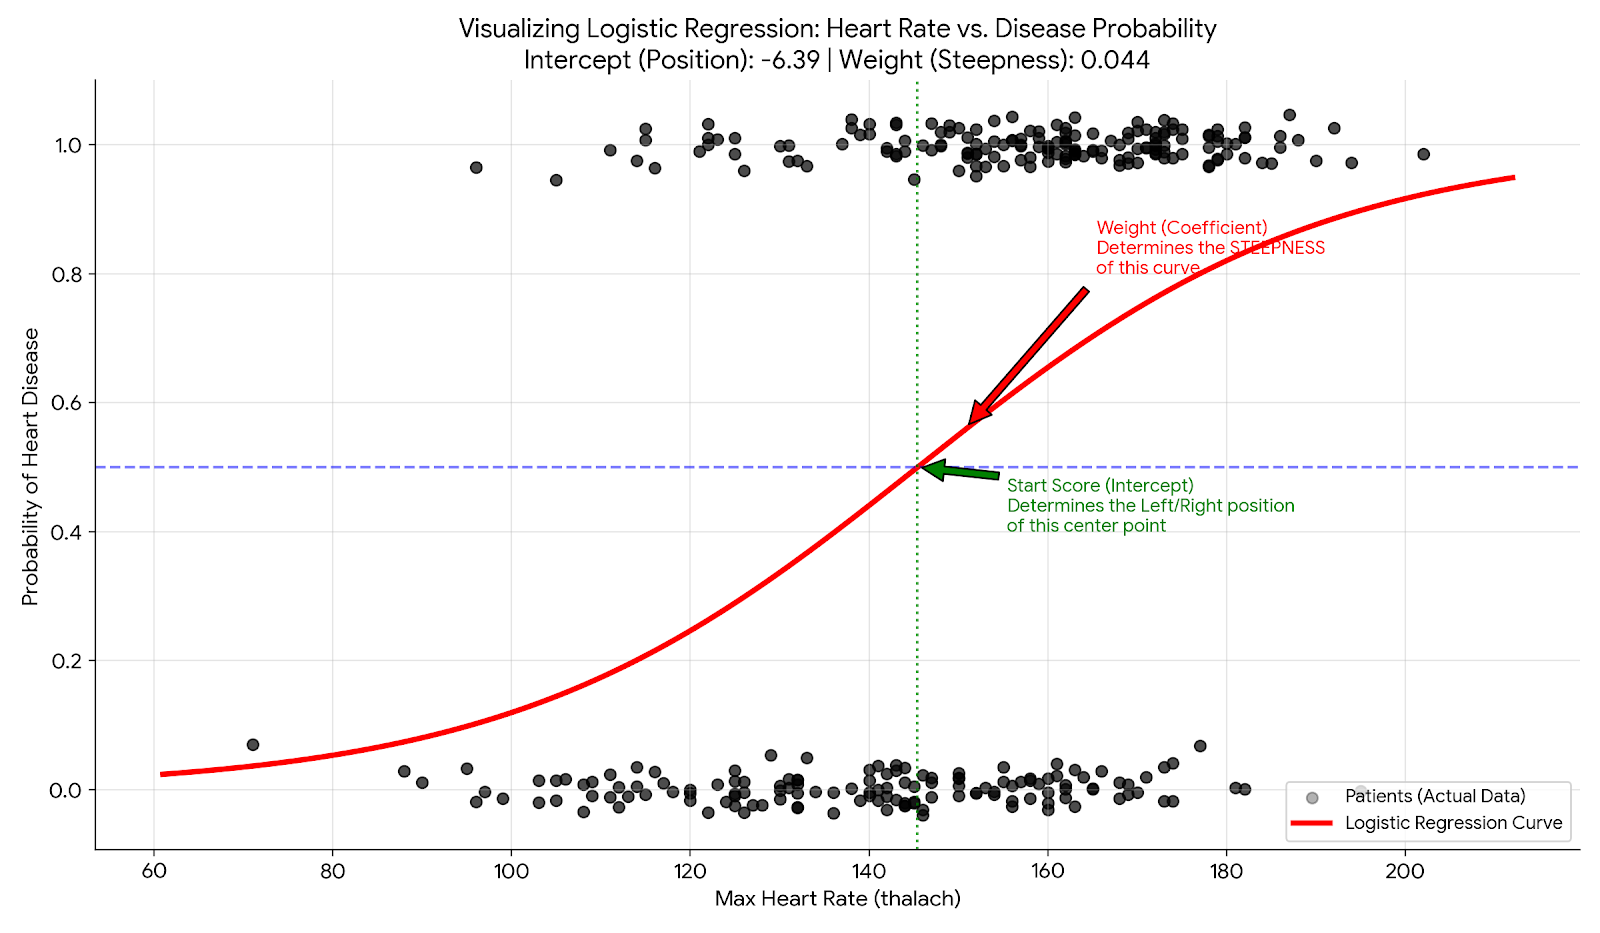